In [5]:
import numpy as np
import pandas as pd

# Regresión simple

In [9]:
x = pd.read_csv('vol/intermediate_result/x.csv')

In [10]:
x

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,2.500000e+08,8.5,4.481306e+08
...,...,...,...,...,...,...,...,...
4099,7000.0,8.419260e+05,2004.000000,1.850000,77.000000,7.000000e+03,7.0,4.247600e+05
4100,7000.0,7.164400e+04,2005.000000,2.126976,80.000000,7.000000e+03,6.3,7.007100e+04
4101,7000.0,9.000000e+02,2005.000000,2.126976,84.000000,3.250000e+03,7.8,4.831933e+07
4102,3967.0,1.044300e+04,2012.000000,2.350000,100.000000,4.045539e+07,6.3,1.044300e+04


In [11]:
y = x['worldwide_gross']

In [12]:
x = x.drop('worldwide_gross',axis=1)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_traing, y_test = train_test_split(x,y,test_size=0.4)

In [15]:
print(len(x))
print(len(x_train))
print(len(x_test))

4104
2462
1642


In [16]:
x.head(1)

,production_budget,title_year,aspect_ratio,duration.1,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,237000000.0,7.9,760505847.0


In [17]:
from sklearn.linear_model import Lasso
model = Lasso()

In [18]:
model.fit(x_train, y_traing)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
predicted = model.predict(x_test)

In [21]:
predicted.shape

(1642,)

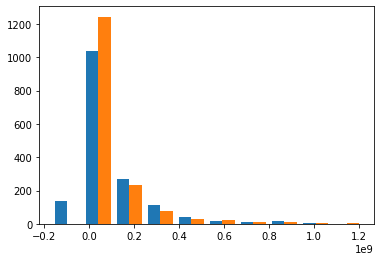

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,y_test]);

# Evaluemos el comportamiento del modelo

In [24]:
model.score(x_test,y_test)


0.878866076511433

In [25]:
residual = y_test - predicted

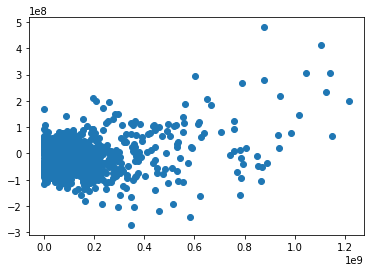

In [26]:
plt.scatter(y_test,residual)

In [28]:
ap_residuals = np.abs(residual) / y_test

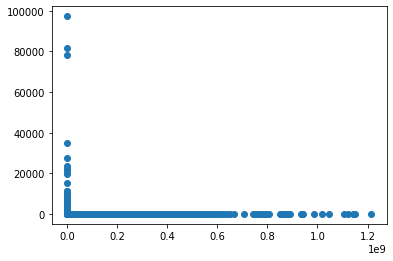

In [29]:
plt.scatter(y_test,ap_residuals)

In [30]:
lap_residuals = np.log(ap_residuals)

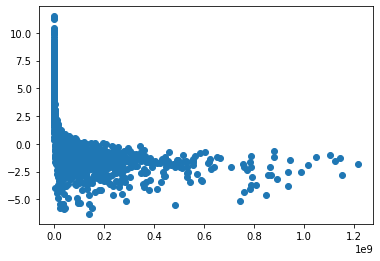

In [31]:
plt.scatter(y_test,lap_residuals)

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

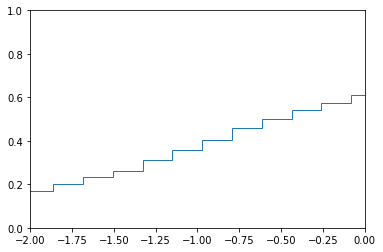

In [34]:
plt.hist(lap_residuals,bins=100, normed=1, histtype='step', cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))